In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

class.csv  sample_data		  test.csv  train.csv
drive	   sample_submission.csv  test.zip  train.zip


In [3]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

Archive:  train/train.zip
  inflating: train/train_00001.jpg   
  inflating: train/train_00002.jpg   
  inflating: train/train_00003.jpg   
  inflating: train/train_00004.jpg   
  inflating: train/train_00005.jpg   
  inflating: train/train_00006.jpg   
  inflating: train/train_00007.jpg   
  inflating: train/train_00008.jpg   
  inflating: train/train_00009.jpg   
  inflating: train/train_00010.jpg   
  inflating: train/train_00011.jpg   
  inflating: train/train_00012.jpg   
  inflating: train/train_00013.jpg   
  inflating: train/train_00014.jpg   
  inflating: train/train_00015.jpg   
  inflating: train/train_00016.jpg   
  inflating: train/train_00017.jpg   
  inflating: train/train_00018.jpg   
  inflating: train/train_00019.jpg   
  inflating: train/train_00020.jpg   
  inflating: train/train_00021.jpg   
  inflating: train/train_00022.jpg   
  inflating: train/train_00023.jpg   
  inflating: train/train_00024.jpg   
  inflating: train/train_00025.jpg   
  inflating: train/train

In [3]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras import models, layers 
from keras import callbacks
from keras.applications import Xception
import cv2
import time
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

Using TensorFlow backend.


In [5]:
!ls 

class.csv  sample_data		  test	    train
drive	   sample_submission.csv  test.csv  train.csv


In [0]:
# !rm -r /content/train_chop

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')

In [9]:
img.shape

(500, 700, 3)

In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chop """
  
  if f'{data_type}_chop' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chop')
  else:
    os.mkdir(f'{data_type}_chop')                                            # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image
    cv2.waitKey(0)
    
    crop_img = img[path_df.iloc[i, 2] : path_df.iloc[i, 4],     # y : y + h
                   path_df.iloc[i,1] : path_df.iloc[i, 3]]     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chop/{path_df.iloc[i,0]}', crop_img)  # save the image
    
    cv2.waitKey(0)

In [0]:
chop_img('train', train_df)

In [0]:
test_df = pd.read_csv('test.csv')

In [0]:
test_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [0]:
chop_img('test', test_df)

In [0]:
len(os.listdir('test_chop'))

6150

# After chop image

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
y = train_df['class']
x = train_df.drop('class', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [0]:
validation_set = pd.concat([X_test, y_test], axis=1)

In [9]:
print(train_df.shape)
print('-----------------')
print(train_set.shape)
print(validation_set.shape)

(9990, 6)
-----------------
(7992, 6)
(1998, 6)


In [10]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
2641,train_02642.jpg,65,23,601,393,31
237,train_00238.jpg,1,33,240,166,146
5195,train_05196.jpg,79,118,373,262,90
6581,train_06582.jpg,64,256,976,587,81
463,train_00464.jpg,168,172,877,592,3


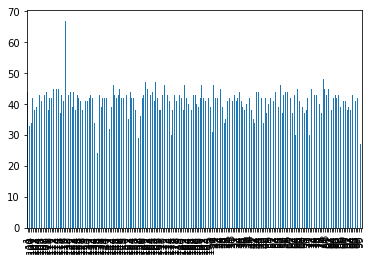

In [11]:
train_set['class'].value_counts().sort_index().plot(kind='bar')

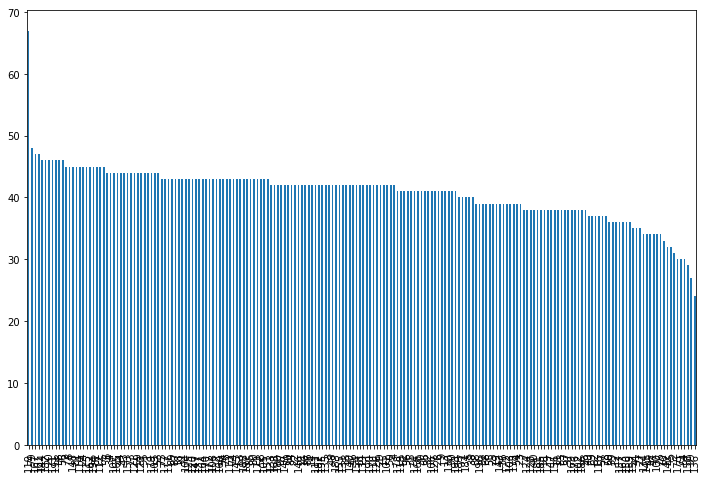

In [12]:
plt.figure(figsize=(12,8))
train_set['class'].value_counts().plot(kind='bar')

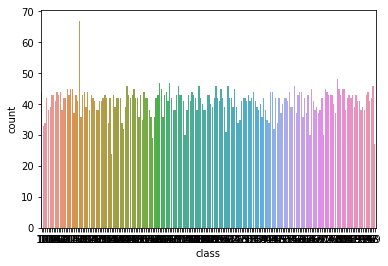

In [13]:
sns.countplot(train_set['class'])

In [14]:
train_set['class'].nunique()

196

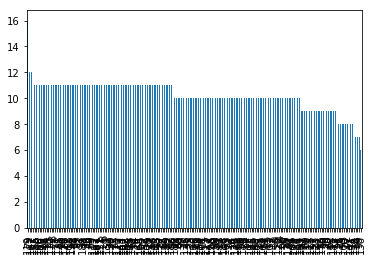

In [15]:
validation_set['class'].value_counts().plot(kind='bar')

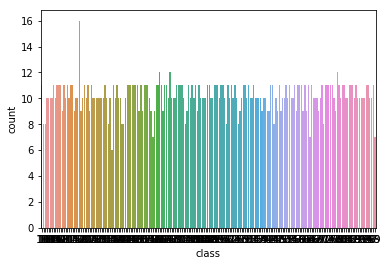

In [16]:
sns.countplot(validation_set['class'])

In [17]:
validation_set['class'].nunique()

196

Split Validation set  0.2 for Hold out set

In [18]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
1980,train_01981.jpg,41,85,618,408,154
788,train_00789.jpg,10,28,268,157,31
3973,train_03974.jpg,75,121,603,370,60
8672,train_08673.jpg,67,29,576,461,139
6070,train_06071.jpg,29,248,760,522,20


In [0]:
val_x = validation_set.drop('class', axis=1)
val_y = validation_set['class']

In [0]:
X_val, X_hol, y_val, y_hol = train_test_split(val_x, val_y, test_size= 0.2, stratify = val_y, random_state=42)

In [21]:
print(X_val.shape, y_val.shape)

(1598, 5) (1598,)


In [0]:
validation_set = pd.concat([X_val, y_val], axis=1)
hold_out_set = pd.concat([X_hol, y_hol], axis=1)

In [23]:
print(validation_set.shape)
print(hold_out_set.shape)

(1598, 6)
(400, 6)


In [24]:
print('validation : ', validation_set['class'].nunique())
print('hold_out : ', hold_out_set['class'].nunique())

validation :  196
hold_out :  196


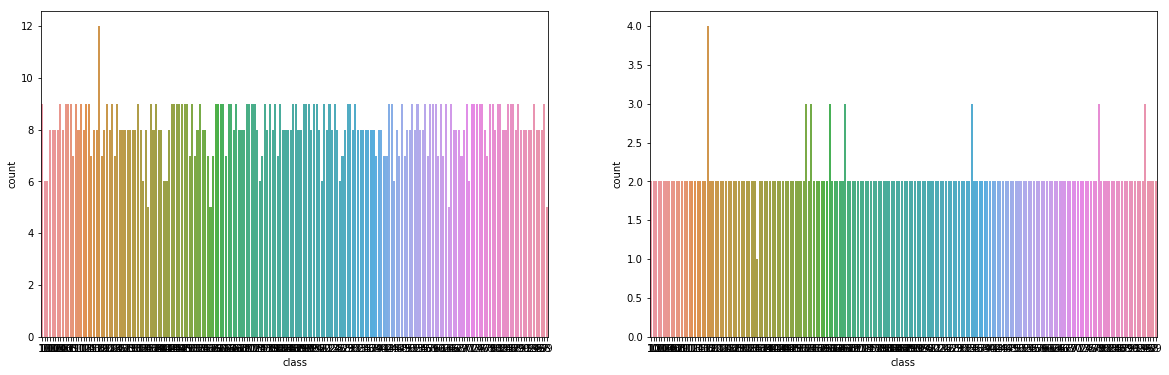

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('class', data = validation_set)

plt.subplot(1,2,2)
sns.countplot('class', data = hold_out_set)

Spliting Done

In [26]:
print('Training Set, "train_set" :', train_set.shape)
print('Validation Set, "validation_set" :', validation_set.shape)
print('Hold Out Set, "hold_out_set" :', hold_out_set.shape)

Training Set, "train_set" : (7992, 6)
Validation Set, "validation_set" : (1598, 6)
Hold Out Set, "hold_out_set" : (400, 6)


In [27]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
2641,train_02642.jpg,65,23,601,393,31
237,train_00238.jpg,1,33,240,166,146
5195,train_05196.jpg,79,118,373,262,90
6581,train_06582.jpg,64,256,976,587,81
463,train_00464.jpg,168,172,877,592,3


In [0]:
test_df = pd.read_csv('test.csv')

In [0]:
datagen = image.ImageDataGenerator(rescale=1./255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2, 
                                  rotation_range=20,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  shear_range=0.2)

validation_gen = image.ImageDataGenerator(rescale = 1./255)

holdout_gen = image.ImageDataGenerator(rescale = 1./255)

test_gen = image.ImageDataGenerator(rescale = 1./255)

In [33]:
test_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [34]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(224,224), class_mode='categorical', batch_size=32)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode='categorical', batch_size=32)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode='categorical', batch_size=32)

test_data = test_gen.flow_from_dataframe(test_df, '/content/test_chop', x_col='img_file', y_col=None, target_size=(224,224), class_mode=None, batch_size=32, shuffle=False)

Found 7992 validated image filenames belonging to 196 classes.
Found 1598 validated image filenames belonging to 196 classes.
Found 400 validated image filenames belonging to 196 classes.
Found 6150 validated image filenames.


In [0]:
i = 0
for batch in train_data:
  img_array = batch[0]
  #print(img_array.shape)
  #print(img_array[i])
  for j in range(len(batch[0])):
    plt.figure(j)
    plt.imshow(img_array[j])
    
  i += 1
  if i % 5:
    break

In [0]:
from keras.applications import MobileNetV2
from keras import models, layers
from keras.utils import plot_model
from keras import callbacks
from keras import optimizers
from keras.models import load_model

## ensembel mobil_net 1 ~ 6

In [36]:
model_1 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net1.h5')
model_2 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net2.h5')
model_3 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net3.h5')
model_4 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net3_2.h5')
model_5 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net5.h5')
model_6 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_save_0710/mobile_net6_rmsprop.h5')

W0713 05:20:56.538480 140228648089472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 05:20:56.583238 140228648089472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 05:20:56.606277 140228648089472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 05:20:56.607163 140228648089472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 05:20:56.608059 140228648

In [0]:
model_list = [model_1, model_2, model_3, model_4, model_5, model_6]

## Validation result

In [59]:
validation_set.shape

(1598, 6)

In [60]:
hold_out_set.shape

(400, 6)

In [64]:
valid_data_for_pred = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = None, target_size=(224,224), class_mode=None, batch_size=2, suffle=False)

holdout_data_for_pred = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = None, target_size=(224,224), class_mode=None, batch_size=2, shuffle=False)

test_data = test_gen.flow_from_dataframe(test_df, '/content/test_chop', x_col='img_file', y_col=None, target_size=(224,224), class_mode=None, batch_size=32, shuffle=False)

Found 1598 validated image filenames.
Found 400 validated image filenames.
Found 6150 validated image filenames.


In [38]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
8311,train_08312.jpg,35,29,336,301,109
9727,train_09728.jpg,72,30,949,688,27
181,train_00182.jpg,57,22,409,226,195
5694,train_05695.jpg,17,20,242,182,114
3273,train_03274.jpg,55,14,529,374,53


In [39]:
validation_set.shape

(1598, 6)

In [52]:
1598 / 2 

799.0

In [0]:
mobile_val_list = []


for model_num, model in enumerate(model_list):
  valid_data_for_pred.reset()
  model_val_pre = model.predict_generator(valid_data_for_pred, steps=1598//2)
  mobile_val_list.append(model_val_pre)
  

In [67]:
mobile_val_list

[array([[1.6274414e-11, 2.9533331e-09, 1.0871908e-11, ..., 2.8430220e-09,
         2.8295703e-11, 1.6117703e-11],
        [5.0877275e-05, 4.9418125e-10, 1.8629326e-10, ..., 1.9080577e-09,
         3.6099052e-10, 3.2377767e-09],
        [6.1688775e-12, 2.8282328e-11, 2.4333772e-08, ..., 4.5435637e-08,
         5.1657243e-09, 2.4733479e-08],
        ...,
        [4.5211210e-10, 2.4053722e-13, 9.8884137e-11, ..., 1.5097770e-10,
         3.9934558e-09, 6.2429533e-09],
        [1.7973408e-09, 1.0665240e-08, 3.6619746e-10, ..., 7.4054956e-06,
         1.4073339e-08, 2.7439349e-08],
        [2.3393532e-09, 2.9028620e-08, 9.0984628e-08, ..., 4.1349843e-08,
         2.9473071e-10, 3.8519808e-08]], dtype=float32),
 array([[1.6900090e-07, 1.2199891e-06, 1.1428349e-03, ..., 1.5472084e-07,
         5.6377489e-09, 5.6233210e-05],
        [4.7853710e-10, 2.5261795e-07, 5.8088553e-08, ..., 3.1956415e-09,
         1.1823795e-09, 2.6758107e-08],
        [2.3782948e-10, 4.6709095e-11, 3.8634634e-13, ...,

In [0]:
del mobile_val_list[2]

In [85]:
mobile_val_list[0].shape

(1598, 196)

In [0]:
val_ensemble_result = np.mean(mobile_val_list, axis=0)

In [87]:
val_ensemble_result.shape

(1598, 196)

In [92]:
val_ensemble_result[0].argmax()

85

In [0]:
val_ensemble_pred = np.argmax(val_ensemble_result, axis=1)

In [94]:
val_ensemble_pred

array([ 85, 168, 176, ..., 140, 131,  30])

In [95]:
val_ensemble_pred.reshape(-1,1)

array([[ 85],
       [168],
       [176],
       ...,
       [140],
       [131],
       [ 30]])

In [111]:
train_data.class_indices

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '103': 5,
 '104': 6,
 '105': 7,
 '106': 8,
 '107': 9,
 '108': 10,
 '109': 11,
 '11': 12,
 '110': 13,
 '111': 14,
 '112': 15,
 '113': 16,
 '114': 17,
 '115': 18,
 '116': 19,
 '117': 20,
 '118': 21,
 '119': 22,
 '12': 23,
 '120': 24,
 '121': 25,
 '122': 26,
 '123': 27,
 '124': 28,
 '125': 29,
 '126': 30,
 '127': 31,
 '128': 32,
 '129': 33,
 '13': 34,
 '130': 35,
 '131': 36,
 '132': 37,
 '133': 38,
 '134': 39,
 '135': 40,
 '136': 41,
 '137': 42,
 '138': 43,
 '139': 44,
 '14': 45,
 '140': 46,
 '141': 47,
 '142': 48,
 '143': 49,
 '144': 50,
 '145': 51,
 '146': 52,
 '147': 53,
 '148': 54,
 '149': 55,
 '15': 56,
 '150': 57,
 '151': 58,
 '152': 59,
 '153': 60,
 '154': 61,
 '155': 62,
 '156': 63,
 '157': 64,
 '158': 65,
 '159': 66,
 '16': 67,
 '160': 68,
 '161': 69,
 '162': 70,
 '163': 71,
 '164': 72,
 '165': 73,
 '166': 74,
 '167': 75,
 '168': 76,
 '169': 77,
 '17': 78,
 '170': 79,
 '171': 80,
 '172': 81,
 '173': 82,
 '174': 83,
 '175': 84,


In [0]:
labels = (train_data.class_indices)

In [104]:
labels

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '103': 5,
 '104': 6,
 '105': 7,
 '106': 8,
 '107': 9,
 '108': 10,
 '109': 11,
 '11': 12,
 '110': 13,
 '111': 14,
 '112': 15,
 '113': 16,
 '114': 17,
 '115': 18,
 '116': 19,
 '117': 20,
 '118': 21,
 '119': 22,
 '12': 23,
 '120': 24,
 '121': 25,
 '122': 26,
 '123': 27,
 '124': 28,
 '125': 29,
 '126': 30,
 '127': 31,
 '128': 32,
 '129': 33,
 '13': 34,
 '130': 35,
 '131': 36,
 '132': 37,
 '133': 38,
 '134': 39,
 '135': 40,
 '136': 41,
 '137': 42,
 '138': 43,
 '139': 44,
 '14': 45,
 '140': 46,
 '141': 47,
 '142': 48,
 '143': 49,
 '144': 50,
 '145': 51,
 '146': 52,
 '147': 53,
 '148': 54,
 '149': 55,
 '15': 56,
 '150': 57,
 '151': 58,
 '152': 59,
 '153': 60,
 '154': 61,
 '155': 62,
 '156': 63,
 '157': 64,
 '158': 65,
 '159': 66,
 '16': 67,
 '160': 68,
 '161': 69,
 '162': 70,
 '163': 71,
 '164': 72,
 '165': 73,
 '166': 74,
 '167': 75,
 '168': 76,
 '169': 77,
 '17': 78,
 '170': 79,
 '171': 80,
 '172': 81,
 '173': 82,
 '174': 83,
 '175': 84,


In [0]:
labels = dict((v,k) for k,v in labels.items())

In [107]:
labels

{0: '1',
 1: '10',
 2: '100',
 3: '101',
 4: '102',
 5: '103',
 6: '104',
 7: '105',
 8: '106',
 9: '107',
 10: '108',
 11: '109',
 12: '11',
 13: '110',
 14: '111',
 15: '112',
 16: '113',
 17: '114',
 18: '115',
 19: '116',
 20: '117',
 21: '118',
 22: '119',
 23: '12',
 24: '120',
 25: '121',
 26: '122',
 27: '123',
 28: '124',
 29: '125',
 30: '126',
 31: '127',
 32: '128',
 33: '129',
 34: '13',
 35: '130',
 36: '131',
 37: '132',
 38: '133',
 39: '134',
 40: '135',
 41: '136',
 42: '137',
 43: '138',
 44: '139',
 45: '14',
 46: '140',
 47: '141',
 48: '142',
 49: '143',
 50: '144',
 51: '145',
 52: '146',
 53: '147',
 54: '148',
 55: '149',
 56: '15',
 57: '150',
 58: '151',
 59: '152',
 60: '153',
 61: '154',
 62: '155',
 63: '156',
 64: '157',
 65: '158',
 66: '159',
 67: '16',
 68: '160',
 69: '161',
 70: '162',
 71: '163',
 72: '164',
 73: '165',
 74: '166',
 75: '167',
 76: '168',
 77: '169',
 78: '17',
 79: '170',
 80: '171',
 81: '172',
 82: '173',
 83: '174',
 84: '175',


In [112]:
val_ensemble_pred

array([ 85, 168, 176, ..., 140, 131,  30])

In [0]:
pred_label = []
for i in val_ensemble_pred:
  pred_label.append(labels[i])

In [114]:
pred_label

['176',
 '74',
 '81',
 '178',
 '132',
 '112',
 '87',
 '95',
 '182',
 '41',
 '35',
 '182',
 '162',
 '55',
 '182',
 '110',
 '70',
 '188',
 '157',
 '180',
 '176',
 '194',
 '182',
 '126',
 '107',
 '7',
 '43',
 '96',
 '126',
 '90',
 '66',
 '150',
 '94',
 '193',
 '130',
 '191',
 '1',
 '162',
 '165',
 '109',
 '186',
 '86',
 '41',
 '16',
 '126',
 '103',
 '100',
 '8',
 '8',
 '152',
 '129',
 '47',
 '25',
 '114',
 '189',
 '185',
 '196',
 '31',
 '146',
 '192',
 '82',
 '65',
 '131',
 '179',
 '29',
 '139',
 '53',
 '135',
 '67',
 '15',
 '170',
 '146',
 '32',
 '127',
 '109',
 '168',
 '81',
 '50',
 '158',
 '141',
 '149',
 '24',
 '85',
 '127',
 '144',
 '132',
 '8',
 '80',
 '109',
 '137',
 '106',
 '29',
 '112',
 '6',
 '41',
 '88',
 '141',
 '94',
 '28',
 '84',
 '94',
 '43',
 '80',
 '70',
 '143',
 '195',
 '181',
 '57',
 '170',
 '77',
 '84',
 '78',
 '78',
 '127',
 '25',
 '68',
 '1',
 '113',
 '105',
 '102',
 '192',
 '8',
 '188',
 '94',
 '64',
 '26',
 '142',
 '122',
 '187',
 '165',
 '8',
 '113',
 '196',
 '100

In [0]:
final_pred = [labels[k] for k in val_ensemble_pred]

In [109]:
final_pred

['176',
 '74',
 '81',
 '178',
 '132',
 '112',
 '87',
 '95',
 '182',
 '41',
 '35',
 '182',
 '162',
 '55',
 '182',
 '110',
 '70',
 '188',
 '157',
 '180',
 '176',
 '194',
 '182',
 '126',
 '107',
 '7',
 '43',
 '96',
 '126',
 '90',
 '66',
 '150',
 '94',
 '193',
 '130',
 '191',
 '1',
 '162',
 '165',
 '109',
 '186',
 '86',
 '41',
 '16',
 '126',
 '103',
 '100',
 '8',
 '8',
 '152',
 '129',
 '47',
 '25',
 '114',
 '189',
 '185',
 '196',
 '31',
 '146',
 '192',
 '82',
 '65',
 '131',
 '179',
 '29',
 '139',
 '53',
 '135',
 '67',
 '15',
 '170',
 '146',
 '32',
 '127',
 '109',
 '168',
 '81',
 '50',
 '158',
 '141',
 '149',
 '24',
 '85',
 '127',
 '144',
 '132',
 '8',
 '80',
 '109',
 '137',
 '106',
 '29',
 '112',
 '6',
 '41',
 '88',
 '141',
 '94',
 '28',
 '84',
 '94',
 '43',
 '80',
 '70',
 '143',
 '195',
 '181',
 '57',
 '170',
 '77',
 '84',
 '78',
 '78',
 '127',
 '25',
 '68',
 '1',
 '113',
 '105',
 '102',
 '192',
 '8',
 '188',
 '94',
 '64',
 '26',
 '142',
 '122',
 '187',
 '165',
 '8',
 '113',
 '196',
 '100

In [0]:
val_true_val = validation_set['class']

In [97]:
val_true_val.values

array(['109', '27', '195', ..., '47', '23', '111'], dtype=object)

In [98]:
val_true_val.shape

(1598,)

In [0]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(val_true_val.values, pred_label)

0.0018773466833541927